In [1]:
import tensorflow as tf
print(tf.__version__)

2024-04-23 18:58:26.119544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('data.xlsx')

In [6]:
df

,Month,Posts Total,Posts Growth,Views,Views Growth
0,2016 10,0,0,2,236
1,2016 11,4,4,218,454
2,2016 12,2,6,191,645
3,2017 01,0,6,3,648
4,2017 02,0,6,16,664
...,...,...,...,...,...
86,2023 12,27,1851,7431,1424579
87,2024 01,38,1889,6042,1430621
88,2024 02,19,1908,6922,1437543
89,2024 03,9,1917,13434,1450977


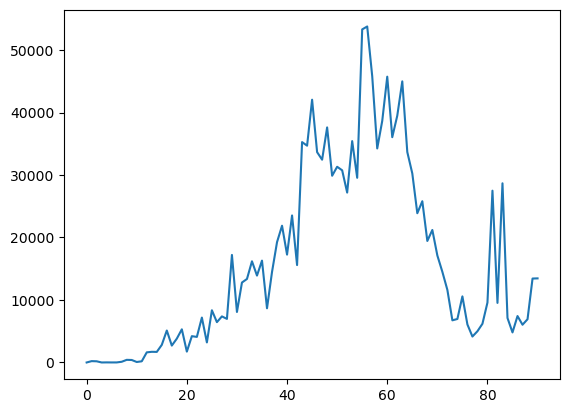

In [8]:
# make the original data
series = df['Views']

# plot it
plt.plot(series)
plt.show()

In [36]:


### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (81, 10) Y.shape (81,)


In [37]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.1),
)

# train the RNN
last_index = N-3

r = model.fit(
    #X[:-N//2], Y[:-N//2],
    X[:last_index], Y[:last_index],
    
    epochs=100,
    
    #validation_data=(X[N-5:], Y[N-5:]),
    validation_data=(X[last_index:], Y[last_index:]),
)

Epoch 1/100
3/3 [==============================] - 0s 69ms/step - loss: 473730112.0000 - val_loss: 99495488.0000
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 477322208.0000 - val_loss: 120254464.0000
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 237187472.0000 - val_loss: 233454848.0000
Epoch 4/100
3/3 [==============================] - 0s 48ms/step - loss: 200079280.0000 - val_loss: 116844120.0000
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 171347760.0000 - val_loss: 91393152.0000
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 163701248.0000 - val_loss: 168990336.0000
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 102880200.0000 - val_loss: 252915840.0000
Epoch 8/100
3/3 [==============================] - 0s 35ms/step - loss: 123409080.0000 - val_loss: 194246992.0000
Epoch 9/100
3/3 [==============================] - 0s 35ms/step - loss: 83035528.0000 - va

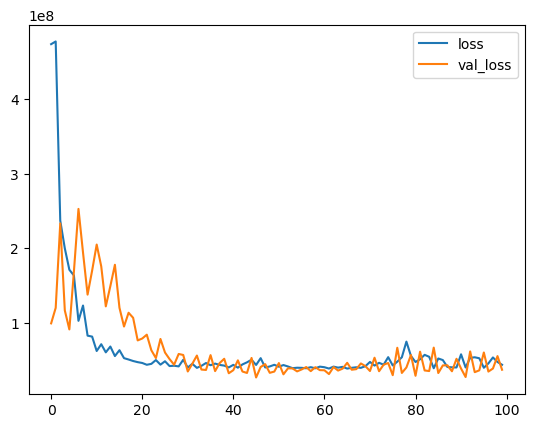

In [38]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [39]:
# Forecast future values (use only self-predictions for making future predictions)



validation_target = Y[last_index:]
validation_predictions = []

# first validation input
last_x = X[last_index] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p



1/1 [==============================] - 0s 21ms/step


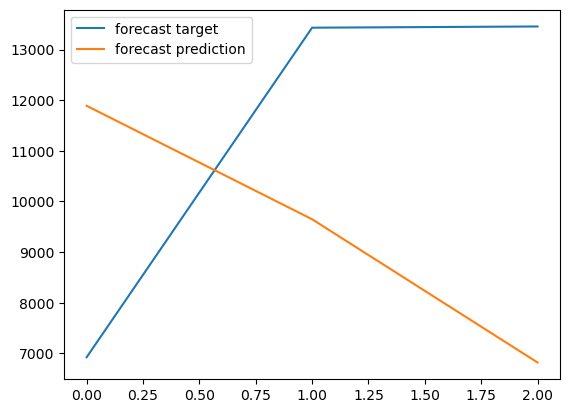

In [40]:


plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

